In [56]:
#verify the csv file

import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
file_path = 'lstm_dataset.csv'
data = pd.read_csv(file_path)

# Print the shape of the DataFrame
print(data.shape)

# Extract columns as NumPy arrays
gust = data['Gust'].values
precipitation = data['Precipitation'].values
temperature = data['Temperature'].values
moisture_sensor = data['MoistureSensor'].values
growth_stage = data['GrowthStage'].values

# Print the lengths of the arrays
print(len(humidity), len(precipitation), len(temperature), len(moisture_sensor), len(growth_stage))


(1000, 7)
1000 1000 1000 1000 1000


In [57]:
# Model training


# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

df=pd.read_csv('lstm_dataset.csv')

# Sample data (replace this with your actual data)
Gust_data = df['Gust'].values  # Replace with your weather API data
Precipitation_data = df['Precipitation'].values  # Replace with your weather API data
Pressure_data = df['Pressure'].values  # Replace with your weather API data
Temperature_data = df['Temperature'].values  # Replace with your weather API data
moisture_data = df['MoistureSensor'].values  # Replace with your soil moisture sensor data
growth_stage_data = df['GrowthStage'].values  # Replace with your YOLO model predictions
water_requirement_labels = df['Water_required'].values  # Replace with actual water requirement data

# Combine data into a unified dataset
X = np.column_stack((Gust_data,Precipitation_data,Pressure_data,Temperature_data, moisture_data, growth_stage_data))
y = water_requirement_labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],1))

# Train the model
history=model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Make predictions on test data
predictions = model.predict(X_test)




Epoch 1/500
25/25 - 3s - loss: 218079.0469 - val_loss: 204183.5000 - 3s/epoch - 107ms/step
Epoch 2/500
25/25 - 0s - loss: 216529.9375 - val_loss: 200821.0938 - 130ms/epoch - 5ms/step
Epoch 3/500
25/25 - 0s - loss: 211549.4375 - val_loss: 195947.0156 - 139ms/epoch - 6ms/step
Epoch 4/500
25/25 - 0s - loss: 208344.9062 - val_loss: 194039.7031 - 180ms/epoch - 7ms/step
Epoch 5/500
25/25 - 0s - loss: 206710.2188 - val_loss: 192616.9375 - 186ms/epoch - 7ms/step
Epoch 6/500
25/25 - 0s - loss: 205355.3125 - val_loss: 191334.4531 - 134ms/epoch - 5ms/step
Epoch 7/500
25/25 - 0s - loss: 204099.2031 - val_loss: 190144.5000 - 157ms/epoch - 6ms/step
Epoch 8/500
25/25 - 0s - loss: 202916.2812 - val_loss: 188998.4062 - 179ms/epoch - 7ms/step
Epoch 9/500
25/25 - 0s - loss: 201766.7812 - val_loss: 187904.9062 - 255ms/epoch - 10ms/step
Epoch 10/500
25/25 - 0s - loss: 200667.3750 - val_loss: 186815.9062 - 213ms/epoch - 9ms/step
Epoch 11/500
25/25 - 0s - loss: 199577.5938 - val_loss: 185764.5000 - 112ms/epo

In [58]:
# Evaluate the model

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 45365.40769695513


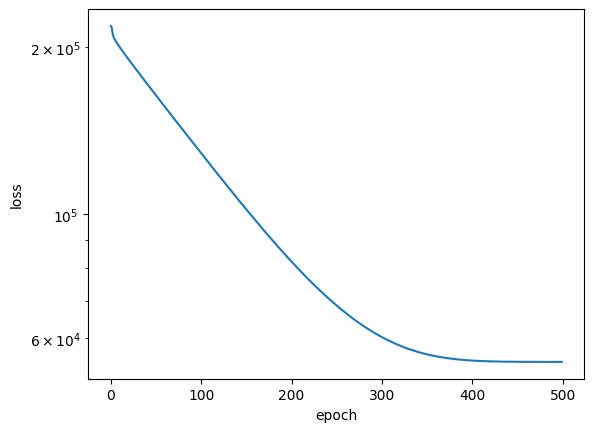

In [59]:
plt.figure()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.semilogy(history.history['loss'])